<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# PG AI - Natural Language Processing and Speech Recognition
# Assisted Practice: Analyzing the Sentiments

DESCRIPTION

In this demo, we will develop a simple application of sentiment analysis using natural language processing techniques.<br>
Sentiment analysis is one of the most common applications in natural language processing. With sentiment analysis, we can decide with what emotion a text is written. <br>
With the widespread use of social media, the need to analyze the content that people share over social media is increasing day by day. Considering the volume of data coming through social media, it is quite difficult to do this with mere  manpower. Therefore, the need for applications that can quickly detect and respond to the positive or negative comments that people write is increasing.<br>

By Edson Teixeira<br>
teixeiraedson252@gmail.com <br>
December 29th 2021

In [1]:
# Step 1: Import the libraries
import pandas as pd
import numpy as np
import pickle
import sys
import os
import io
import re
from sys import path
import numpy as np
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from string import punctuation, digits
from IPython.core.display import display, HTML
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [2]:
# Step 2: Dataset
# Amazon Data
input_file = "amazon_cells_labelled.txt"
amazon = pd.read_csv(input_file,delimiter='\t',header=None)
amazon.columns = ['Sentence','Class']
# Yelp Data
input_file = "yelp_labelled.txt"
yelp = pd.read_csv(input_file,delimiter='\t',header=None)
yelp.columns = ['Sentence','Class']
# Imdb Data
input_file = "imdb_labelled.txt"
imdb = pd.read_csv(input_file,delimiter='\t',header=None)
imdb.columns = ['Sentence','Class']

In [3]:
# Step 3: Combine all datasets 
data = pd.DataFrame()
data = pd.concat([amazon, yelp, imdb])
data['index'] = data.index
data

,Sentence,Class,index
0,So there is no way for me to plug it in here i...,0,0
1,"Good case, Excellent value.",1,1
2,Great for the jawbone.,1,2
3,Tied to charger for conversations lasting more...,0,3
4,The mic is great.,1,4
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,743
744,"Unfortunately, any virtue in this film's produ...",0,744
745,"In a word, it is embarrassing.",0,745
746,Exceptionally bad!,0,746


   Class  COUNT
0      0    846
1      1    827


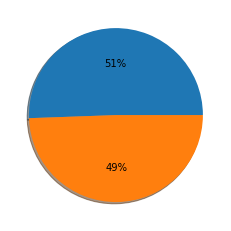

In [4]:
# Step 4: Statistics
pd.set_option('display.width', 4000)
pd.set_option('display.max_rows', 1000)
distOfDetails = data.groupby(by='Class', as_index=False).agg({'index': pd.Series.nunique}).sort_values(by='index', ascending=False)
distOfDetails.columns =['Class', 'COUNT']
print(distOfDetails)
#Distribution of All Categories
plt.pie(distOfDetails['COUNT'],autopct='%1.0f%%',shadow=True, startangle=360)
plt.show()

In [5]:
#  Step 5: Data Preprocessing
columns = ['index','Class', 'Sentence']
df_ = pd.DataFrame(columns=columns)
#lower string
data['Sentence'] = data['Sentence'].str.lower()
#remove email adress
data['Sentence'] = data['Sentence'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+', '', regex=True)
#remove IP address
data['Sentence'] = data['Sentence'].replace('((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}', '', regex=True)
#remove punctaitions and special chracters
data['Sentence'] = data['Sentence'].str.replace('[^\w\s]','')
#remove numbers
data['Sentence'] = data['Sentence'].replace('\d', '', regex=True)
#remove stop words
for index, row in data.iterrows():
    word_tokens = word_tokenize(row['Sentence'])
    filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')]
    df_ = df_.append({"index": row['index'], "Class":  row['Class'],"Sentence": " ".join(filtered_sentence[0:])}, ignore_index=True)
data = df_

In [6]:
# Step 6: Data Split—Training vs. Test
X_train, X_test, y_train, y_test = train_test_split(data['Sentence'].values.astype('U'),data['Class'].values.astype('int32'), test_size=0.10, random_state=0)
classes  = data['Class'].unique()

In [7]:
#  Step 7: Create a Model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
#grid search result
vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2') 
counts = vectorizer.fit_transform(X_train)
vocab = vectorizer.vocabulary_
classifier = SGDClassifier(alpha=1e-05,max_iter=50,penalty='elasticnet')
targets = y_train
classifier = classifier.fit(counts, targets)
example_counts = vectorizer.transform(X_test)
predictions = classifier.predict(example_counts)

In [8]:
# Step 8: Test a Model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
#Model Evaluation
acc = accuracy_score(y_test, predictions, normalize=True)
hit = precision_score(y_test, predictions, labels=classes)
capture = recall_score(y_test, predictions, labels=classes)
print('Model Accuracy:%.2f'%acc)
print(classification_report(y_test, predictions))

Model Accuracy:0.80
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       139
           1       0.81      0.77      0.79       136

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275

